# Linear Algebra 1

- Installation requirements: `pip3 install rasterio Pillow`

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# new import statements
from sklearn.linear_model import LinearRegression

### Where do numpy arrays show up in ML?

- A `DataFrame` is just a matrix wihout column names or row indices

In [2]:
df = pd.DataFrame([[0, 2, 1], [2, 3, 4], [8, 5, 6]], columns=["x1", "x2", "y"])
df

x1  x2  y
0   0   2  1
1   2   3  4
2   8   5  6

`df.values` gives us a `numpy.ndarray` of all the values.
`nd` stands for n-dimensional:
- 2-dimensional for matrix
- 1-dimensional for vector

In [3]:
print(type(df.values))
df.values

<class 'numpy.ndarray'>


array([[0, 2, 1],
       [2, 3, 4],
       [8, 5, 6]])

In [4]:
model = LinearRegression()
model.fit(df[["x1", "x2"]], df["y"])
model.coef_

array([-2.,  7.])

In [5]:
model.predict(df[["x1", "x2"]])

array([1., 4., 6.])

#### How does `predict` actually work?

- Matrix multiplication with coefficients (`@`) and add intercept

In [6]:
df[["x1", "x2"]].values @ model.coef_ + model.intercept_

array([1., 4., 6.])

### How to create numpy arrays from scratch?

- requires `import numpy as np`
    - `np.array(<object>)`: creates numpy array from object instance; documentation: https://numpy.org/doc/stable/reference/generated/numpy.array.html
    - `np.ones(<shape>)`: creates an array of ones; documentation: https://numpy.org/doc/stable/reference/generated/numpy.ones.html
    - `np.zeros(<shape>)`: creates an array of zeros; documentation: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html

In [7]:
np.array([7, 8, 9])

array([7, 8, 9])

In [8]:
np.ones(8)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
np.zeros(8)

array([0., 0., 0., 0., 0., 0., 0., 0.])

#### Review: `range()`

In [10]:
# 0 to exclusive end
# range(END)
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
# inclusive start to exclusive end
# range(START, END)
list(range(-4, 10))

[-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
# inclusive start to exclusive end with a step between values
# default STEP is 1
# range(START, END, STEP)
list(range(-4, 10, 2))

[-4, -2, 0, 2, 4, 6, 8]

In [13]:
# range cannot have floats for the STEP
list(range(-4, 10, 0.5))

TypeError: 'float' object cannot be interpreted as an integer

#### Back to `numpy`
- `np.arange([start, ]stop, [step, ])`: gives us an array based on range; documentation: https://numpy.org/doc/stable/reference/generated/numpy.arange.html

In [ ]:
# array range
np.arange(-4, 10, 0.5)   

#### Review: Slicing

- `seq_object[<START>:<exclusive_END>:<STEP>]`
    - `<START>` is optional; default is index 0
    - `<END>` is optional; default is `len` of the sequence
- slicing creates a brand new object instance

In [ ]:
# REVIEW: Python slicing of lists
a = [7, 8, 9, 10]
# slice out 8 and 10
b = a[1::2] 
b

In [ ]:
b[1] = 100
b

In [ ]:
# original object instance doesn't change
a

Slicing is slow because of creating a new object instance.

#### How to slice `numpy` arrays? 
- Unlike regular slicing `numpy` slicing is very efficient - doesn't do a copy

In [ ]:
a = np.array([7, 8, 9, 10])
# slice out 8 and 10
b = a[1::2]  
b

In [ ]:
b[1] = 100
a

How can you ensure that changes to a slice don't affect original `numpy.array`? Use `copy` method.

In [ ]:
a = np.array([7, 8, 9, 10])
b = a.copy() # copy everything instead of sharing
b = a[1::2] 
b[1] = 100
b, a

#### Creating Multi-Dimensional Arrays

- using nested data structures like list of lists
- `shape` gives us the dimension of the `numpy.array`
- `len()` gives the first dimension, that is `shape[0]`

In [ ]:
a = np.array([1, 2, 3])
a, len(a)

How many numbers are there in the below `tuple`?

In [ ]:
a.shape

One number in this `tuple`, and it is 3.

In [ ]:
# 2-D array using list of lists
b = np.array([[1, 2, 3], [4, 5, 6]])
b

In [ ]:
b.shape

2 dimensional (because two numbers are there in this `tuple`). sizes 2 and 3 along those dimensions.

In [ ]:
len(b)

#### How to reshape a `numpy.array`?

- `<obj>.reshape(<newshape>)`: reshapes the dimension of the array; documentation: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [ ]:
b

In [ ]:
b.reshape(3, 2)

In [ ]:
b.reshape(6)

We cannot add/remove values while reshaping.

In [ ]:
b.reshape(5)

In [ ]:
b.reshape(7)

-1 means whatever size is the necessary shape for the remaining values. Enables us to just control one of the dimensions.

In [ ]:
b.reshape(3, -1)

In [ ]:
b.reshape(-1)

Generate a 10*10 with numbers from 0 to 99.

In [ ]:
np.arange(100).reshape(10, -1)

### Vocabulary
- scalar: 0 dimensional array
- vector: 1 dimensional array
- matrix: 2 dimensional array
- tensor: n dimensional (0, 1, 2, 3, ...) array 

### Images as Tensors

- `wget` command:
    - `wget <url> -O <local file name>`

In [ ]:
# Only run this cell once
!wget "https://upload.wikimedia.org/wikipedia/commons/f/f2/Coccinella_magnifica01.jpg" -O bug.jpg

#### How to read an image file?

- required `import matplotlib.pyplot as plt`
    - `plt.imread(<fname>)`: reads an image file into a 3-dimensional array --- rows(pixels), columns(pixels), colors (red/green/blue)
    - `plt.imshow(<array>, cmap=<color map>)`: displays the image

In [ ]:
a = plt.imread("bug.jpg")
type(a)

In [ ]:
# 3-dimensional array
# rows(pixels), columns(pixels), colors (red/green/blue)
a.shape

In [ ]:
plt.imshow(a)

In [ ]:
a 
# each inner array has 3-color representation R, G, B
# two color scales: floats (0.0 to 1.0) OR ints (0 to 255)

#### GOAL: crop down just to the bug using slicing

- `<array>[ROW SLICE, COLUMN SLICE, COLOR SLICE]`

In [ ]:
plt.imshow(a[600:1600, 400:1650, :])

#### GOAL: show clearly where RED is high on the image
- two formats:
    - 3D (row, column, color)
    - 2D (row, column) => black/white (red/blue)

In [ ]:
a.shape

Pull out only layer 0, which is the red layer.
- 0 is red
- 1 is green
- 2 is blue

Use index only for the color dimension and slices for row and column dimensions

In [ ]:
a[:, :, 0].shape 

In [14]:
# instead of using black and white, 
# it is just assigning some color for light and dark
plt.imshow(a[:, :, 0])

NameError: name 'a' is not defined

In [ ]:
# better to use grayscale
plt.imshow(a[:, :, 0], cmap="gray")

Wherever there was red, the image is bright. The bug is very bright because of that. There are other places in the image that are bright but were not red. This is because when we mix RGB, we get white. Any color that was light will also have a lot of RED.

This could be a pre-processing step for some ML algorithm that can identify RED bugs. 

#### GOAL: show a grayscale that considers the average of all colors

- `<array>.mean(axis=<val>)`:
    - `axis` should be 0 for 1st dimension, 1 for 2nd dimension, 2 for 3rd dimension

In [15]:
# average over all the numbers
# gives a measure of how bright the image is overall
a.mean()

NameError: name 'a' is not defined

In [ ]:
a.shape

In [16]:
# average over each column and color combination
a.mean(axis=0).shape

NameError: name 'a' is not defined

In [17]:
# average over each row and color combination
a.mean(axis=1).shape

NameError: name 'a' is not defined

In [ ]:
# average over each row and column combination
a.mean(axis=2).shape

In [18]:
plt.imshow(a.mean(axis=2), cmap="gray")

NameError: name 'a' is not defined

This could also be a pre-processing step for some ML algorithm that expects black and white images.

### Vector Multiplication: Overview

#### Elementwise Multiplication

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 \\ 5 \\ 6
\end{bmatrix}$

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 & 5 & 6
\end{bmatrix}$

### Dot Product

$\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
\cdot
\begin{bmatrix}
4 \\ 5 \\ 6
\end{bmatrix}$

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
\cdot
\begin{bmatrix}
4 & 5 & 6
\end{bmatrix}$

In [19]:
v1 = np.array([1, 2, 3]).reshape(-1, 1) # vertical shape
v1

array([[1],
       [2],
       [3]])

In [20]:
v2 = np.array([4, 5, 6]).reshape(-1, 1)
v2

array([[4],
       [5],
       [6]])

#### Elementwise Multiplication

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 \\ 5 \\ 6
\end{bmatrix}$
\=
$\begin{bmatrix}
4 \\ 10 \\ 18
\end{bmatrix}$

In [21]:
v1 * v2   # [1*4, 2*5, 3*6]

array([[ 4],
       [10],
       [18]])

#### Transpose

- flips the x and y

In [22]:
v2

array([[4],
       [5],
       [6]])

In [23]:
v2.T # horizontal

array([[4, 5, 6]])

In [24]:
v2.T.T # vertical

array([[4],
       [5],
       [6]])

In [25]:
v1.shape

(3, 1)

In [26]:
v2.T.shape

(1, 3)

#### Elementwise Multiplication

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 & 5 & 6
\end{bmatrix}$
\=
?

In [27]:
v1 * v2.T # how is this working?

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

### Broadcast

Two use cases:
1. "stretch" 1 => N along any dimension to make shapes compatible
2. add dimensions of size 1 to the beginning of a shape

Element-wise operation between `v1 * v2.T` will automatically "Broadcast" v1 to 3 x 3 (stretching the second dimension) and "Broadcast" v2.T to 3 x 3 (stretching the first dimension).

In [28]:
v1.shape

(3, 1)

In [29]:
v2.T.shape

(1, 3)

How can we manually replicate that? 

#### `np.concatenate([a1, a2, ...], axis=0)`.
- `a1, a2, …`: sequence of arrays
- `axis`: the dimension along with we want to join the arrays
    - default value is 0, which is for row dimension (down)
    - value of 1 is for column dimension (across)

In [30]:
v1

array([[1],
       [2],
       [3]])

In [31]:
v1.shape

(3, 1)

In [32]:
# Broadcast v1 to 3 x 3 (stretching the second dimension)
v1_broadcast = np.concatenate([v1, v1, v1], axis=1)
v1_broadcast

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [33]:
v2.T

array([[4, 5, 6]])

In [34]:
v2.T.shape

(1, 3)

In [35]:
# Broadcast v2.T to 3 x 3 (stretching the second dimension)
v2t_broadcast = np.concatenate([v2.T, v2.T, v2.T], axis=0)
v2t_broadcast

array([[4, 5, 6],
       [4, 5, 6],
       [4, 5, 6]])

In [36]:
v1_broadcast * v2t_broadcast # same as v1 * v2.T

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [37]:
v1 * v2.T

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

#### Generate a multiplication table from 1 to 10

In [38]:
# 1. generate a range of numbers from 1 to 10
# 2. reshape that to a vertical numpy array
digits = np.arange(1, 11).reshape(-1, 1)
digits

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [39]:
digits * digits.T

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

In [40]:
# Convert the multiplication table into a DataFrame
pd.DataFrame(digits * digits.T, columns=digits.reshape(-1), index=digits.reshape(-1))

1   2   3   4   5   6   7   8   9    10
1    1   2   3   4   5   6   7   8   9   10
2    2   4   6   8  10  12  14  16  18   20
3    3   6   9  12  15  18  21  24  27   30
4    4   8  12  16  20  24  28  32  36   40
5    5  10  15  20  25  30  35  40  45   50
6    6  12  18  24  30  36  42  48  54   60
7    7  14  21  28  35  42  49  56  63   70
8    8  16  24  32  40  48  56  64  72   80
9    9  18  27  36  45  54  63  72  81   90
10  10  20  30  40  50  60  70  80  90  100

#### Back to bug example

Let's do more complex broadcasting example

In [41]:
# Read "bug.jpg" into a numpy array
a = plt.imread("bug.jpg")
a.shape

(1688, 2521, 3)

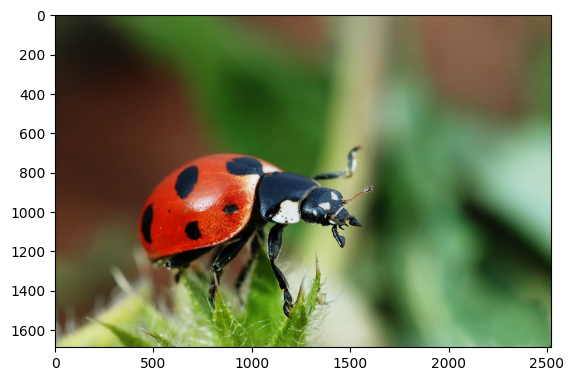

In [42]:
# Display "bug.jpg"
plt.imshow(a)

#### GOAL: create a fade effect (full color on the left, to black on the right)

- To achieve this, we need to:
    1. multiply the left most columns with numbers close to 1's (retains the original color)
    2. the rightmost columns with numbers close to 0's (0 will give us black color)
    3. the middle columns with numbers close to 0.5's

In [43]:
a.shape

(1688, 2521, 3)

In [44]:
# Create an array called fade with 2521 numbers
fade = 1 - np.arange(2521) / 2521
print(fade.shape)
fade
# How many dimensions does fade have? 1

(2521,)


array([1.00000000e+00, 9.99603332e-01, 9.99206664e-01, ...,
       1.19000397e-03, 7.93335978e-04, 3.96667989e-04])

In [45]:
a.shape

(1688, 2521, 3)

How can we multiply `a` and `fade`? That is how do we `reshape` `fade`?

Can we reshape fade to 1688 x 2521 x 3?

In [46]:
fade.reshape(1688, 2521, 3)

ValueError: cannot reshape array of size 2521 into shape (1688,2521,3)

The answer is no - because `reshape` can never add new values / delete values. Meaning after `reshape`, we need to exactly have 2521 values.

In [47]:
# Keep in mind that we need to multiple each column by a number, so which dimension should
# be 2521?
fade.reshape(1, 2521, 1)

array([[[1.00000000e+00],
        [9.99603332e-01],
        [9.99206664e-01],
        ...,
        [1.19000397e-03],
        [7.93335978e-04],
        [3.96667989e-04]]])

In [48]:
# Let's multiple a by reshaped fade
plt.imshow(a * fade.reshape(1, 2521, 1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Why doesn't this work? Remember pixels can be either represented using the values 0 to 255 or 0 to 1. `a` has the scale 0 to 255 and `fade.reshape(...)` has the scale 0 to 1.

In [49]:
plt.imshow(a / 255.0 * fade.reshape(1, 2521, 1))

### Broadcast

Two use cases:
1. "stretch" 1 => N along any dimension to make shapes compatible
2. add dimensions of size 1 to the beginning of a shape

In [50]:
a.shape

(1688, 2521, 3)

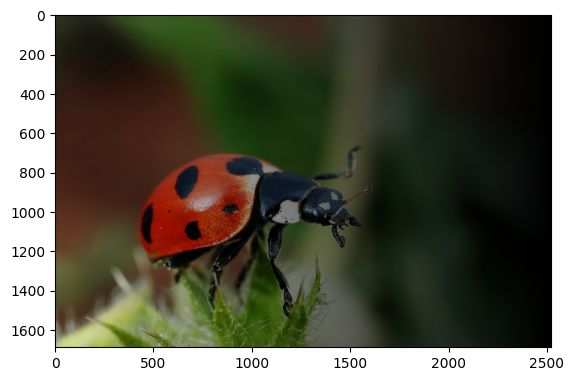

In [51]:
plt.imshow(a / 255.0 * fade.reshape(2521, 1))
# BROADCAST: (2521, 1) => (1, 2521, 1) => (1688, 2521, 3)

### Dot Product

$\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
\cdot
\begin{bmatrix}
4 \\ 5 \\ 6
\end{bmatrix}$

In [52]:
v1

array([[1],
       [2],
       [3]])

In [53]:
v2

array([[4],
       [5],
       [6]])

In [54]:
v1 * v2   # 1*4, 2*5, 3*6

array([[ 4],
       [10],
       [18]])

In [55]:
v1.T

array([[1, 2, 3]])

In [56]:
v2

array([[4],
       [5],
       [6]])

#### `np.dot(a1, a2)` or `a1 @ a2`

In [57]:
np.dot(v1.T, v2)   # 1*4 + 2*5 + 3*6

array([[32]])

In [58]:
v1.T @ v2

array([[32]])

#### `.item()` gives you just the values

In [59]:
(v1.T @ v2).item()   # pulls out the only number in the results

32

In [60]:
np.dot(v1.T, v2).item()

32